In [2]:
from scipy import interpolate
from NuRadioReco.utilities import units
from numpy.random import Generator, Philox
from NuRadioMC.examples.Sensitivities.E2_fluxes3 import get_TAGZK_flux_ICRC2021
import numpy as np

def get_energy_from_flux(Emin, Emax, n_events, flux, rnd=None):
    """
    returns randomly distribution of energy according to a flux

    Parameters
    ----------
    Emin: float
        minumum energy
    Emax: float
        maximum energy
    n_event: int
        number of events to generate
    flux: function
        must return flux as function of energy in units of events per energy, time, solid angle and area
    rnd: random generator object
        if None is provided, a new default random generator object is initialized

    Returns
    -------
    energies: array of floats
        array of energies
    """
    if(rnd is None):
        rnd = np.random.default_rng()
    xx_edges = np.linspace(Emin, Emax, 10000000)
    xx = 0.5 * (xx_edges[1:] + xx_edges[:-1])
    yy = flux(xx)
    cum_values = np.zeros(xx_edges.shape)
    cum_values[1:] = np.cumsum(yy * np.diff(xx_edges))
    inv_cdf = interpolate.interp1d(cum_values, xx_edges)
    r = rnd.uniform(0, cum_values.max(), n_events)
    return inv_cdf(r)

def ice_cube_nu_fit_2022(energy, slope=-2.37, offset=1.44):
    # 9.5 years analysis 2.37+0.09−0.09, offset 1.44 + 0.25 - 0.26, Astrophysical normalization @ 100TeV: 1.44+0.25−0.26 × 10−18 GeV−1cm−2s−1 sr−1
    flux = 3 * offset * (energy / (100 * units.TeV)) ** slope * 1e-18 * \
        (units.GeV ** -1 * units.cm ** -2 * units.second ** -1 * units.sr ** -1)
    return flux

def J(E):
    return ice_cube_nu_fit_2022(E) + get_TAGZK_flux_ICRC2021(E)

def J_ice_cube(E):
    return ice_cube_nu_fit_2022(E)

def J_TAGZK_flux_ICRC2021(E):
    return get_TAGZK_flux_ICRC2021(E)

rnd = Generator(Philox(None))

energies_ice_cube = get_energy_from_flux(5e16 * units.eV, 1e19 * units.eV, 1000, J_ice_cube, rnd)
energies_tagzk = get_energy_from_flux(5e16 * units.eV, 1e19 * units.eV, 1000, J_TAGZK_flux_ICRC2021, rnd)
energies_total = get_energy_from_flux(5e16 * units.eV, 1e19 * units.eV, 1000, J, rnd)

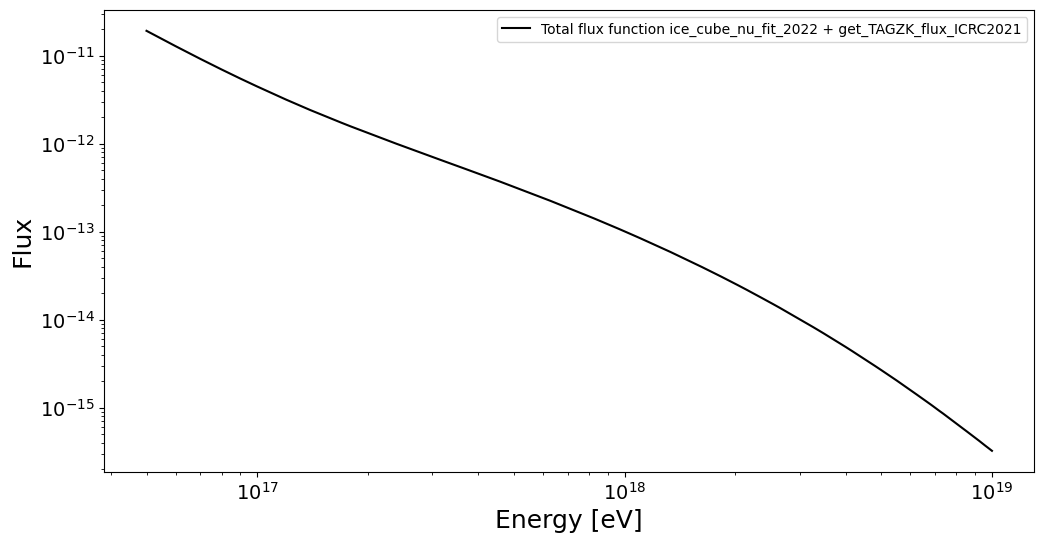

In [7]:

import matplotlib.pyplot as plt

es = np.linspace(5e16, 1e19, 1000)
# e_ice_cube = np.arange(0,len(energies_ice_cube))
# e_tagzk = np.arange(0,len(energies_tagzk))

# total_manual = np.concat([energies_ice_cube, energies_tagzk])

fig, ax = plt.subplots(figsize=(12, 6))
# ax.hist(energies_ice_cube, bins=50, alpha=0.3, edgecolor='black', linewidth=0.5,label='IceCube fit 2022')
# ax.hist(energies_tagzk, bins=50, alpha=0.3, edgecolor='black', linewidth=0.5,label='TAGZK ICRC2021')
# ax.hist(energies_total, bins=50, alpha=1, edgecolor='black', linewidth=0.5, label='Total flux')
plt.plot(es, J(es) * 1e27, label='Total flux function ice_cube_nu_fit_2022 + get_TAGZK_flux_ICRC2021', color='black')
# ax.hist(total_manual, bins=50, alpha=0.3, edgecolor='black', linewidth=0.5, label='Total manual')
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('Flux')
# ax.set_ylabel('Counts')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()

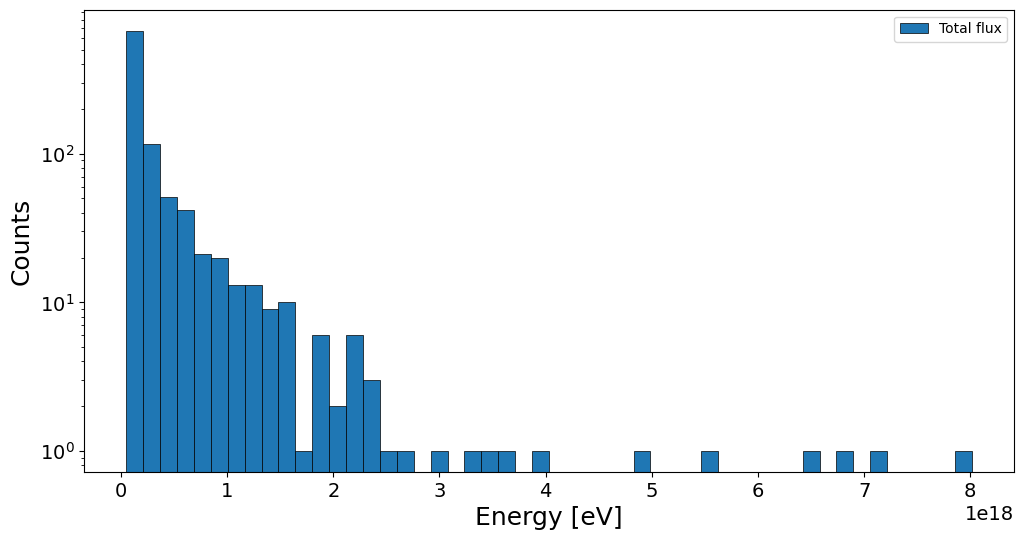

In [4]:

import matplotlib.pyplot as plt

# e_total = np.arange(0,len(energies_total))
# e_ice_cube = np.arange(0,len(energies_ice_cube))
# e_tagzk = np.arange(0,len(energies_tagzk))

# total_manual = np.concat([energies_ice_cube, energies_tagzk])

fig, ax = plt.subplots(figsize=(12, 6))
# ax.hist(energies_ice_cube, bins=50, alpha=0.3, edgecolor='black', linewidth=0.5,label='IceCube fit 2022')
# ax.hist(energies_tagzk, bins=50, alpha=0.3, edgecolor='black', linewidth=0.5,label='TAGZK ICRC2021')
ax.hist(energies_total, bins=50, alpha=1, edgecolor='black', linewidth=0.5, label='Total flux')
# ax.hist(total_manual, bins=50, alpha=0.3, edgecolor='black', linewidth=0.5, label='Total manual')
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('Counts')
ax.set_yscale('log')
ax.legend()